In [12]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
h15 = pd.read_csv('2015.csv', on_bad_lines='skip')

h15 = h15.round(2)
h15.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe             1.0             7.59   
1      Iceland  Western Europe             2.0             7.56   
2      Denmark  Western Europe             3.0             7.53   
3       Norway  Western Europe             4.0             7.52   
4       Canada   North America             5.0             7.43   

   Standard Error  Economy (Gr Capita)  Family  Health (Life Expectancy)  \
0            0.03                 1.40    1.35                      0.94   
1            0.05                 1.30    1.40                      0.95   
2            0.03                 1.33    1.36                      0.87   
3            0.04                 1.46    1.33                      0.89   
4            0.04                 1.33    1.32                      0.91   

   Freedom  Trust (Government Corruption)  Generosity  Dystopia ResidualDP pe  
0     0.67                           0.42        0.30                    2.52  
1     0.63                           0.14        0.44                    2.70  
2     0.65                           0.48        0.34                    2.49  
3     0.67                           0.37        0.35                    2.47  
4     0.63                           0.33        0.46                    2.45

- Average of happiness score 

In [14]:
happiness = h15['Happiness Score'].mean()
print(happiness)

5.326433121019107


1- The repeat size of each region

C:\Users\User\AppData\Local\Temp\ipykernel_9456\1166474676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')


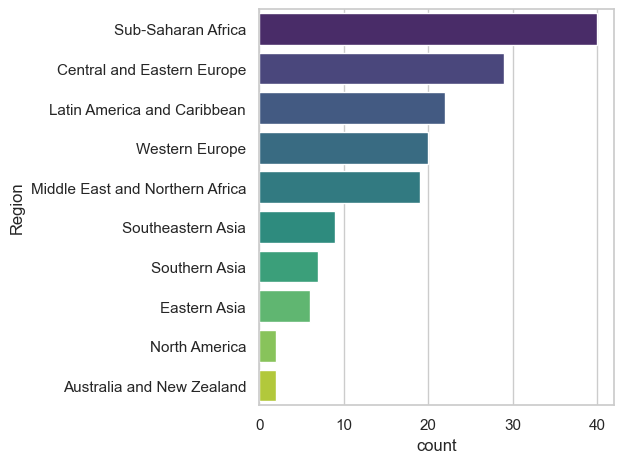

In [48]:
region = h15['Region'].value_counts().reset_index()
sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')
plt.tight_layout()
plt.show()


2- Top Regions with Happiness Score > 5.3 in 2015

C:\Users\User\AppData\Local\Temp\ipykernel_9456\2235565953.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')


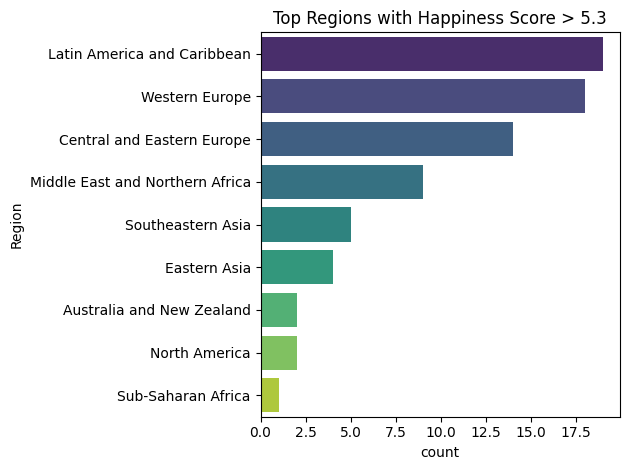

In [36]:
filtered = h15[h15['Happiness Score'] > 5.3]
region = filtered['Region'].value_counts().reset_index()
region.columns = ['Region', 'count']
sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')
plt.title('Top Regions with Happiness Score > 5.3')
plt.tight_layout()
plt.show()

3- Top Regions with Happiness Score < 5.3 in 2015

C:\Users\User\AppData\Local\Temp\ipykernel_9456\3663022572.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Region', data=region.head(8), palette='viridis')


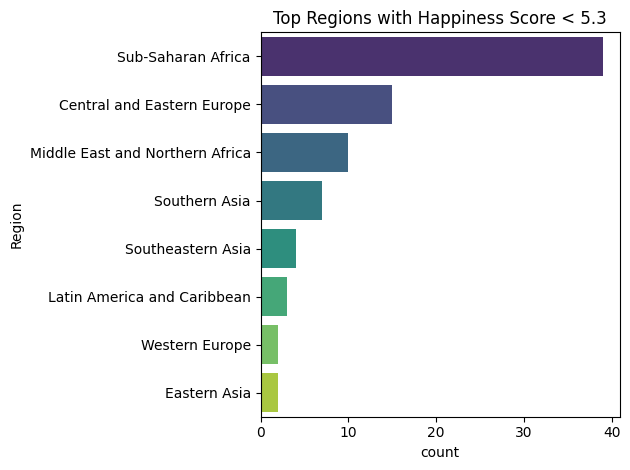

In [17]:
filtered = h15[h15['Happiness Score'] < 5.3]
region = filtered['Region'].value_counts().reset_index()
region.columns = ['Region', 'count']
sns.barplot(x='count', y='Region', data=region.head(8), palette='viridis')
plt.title('Top Regions with Happiness Score < 5.3')
plt.tight_layout()
plt.show()

4- Comparison of average scores by category for all regions

C:\Users\User\AppData\Local\Temp\ipykernel_9456\1993870237.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')


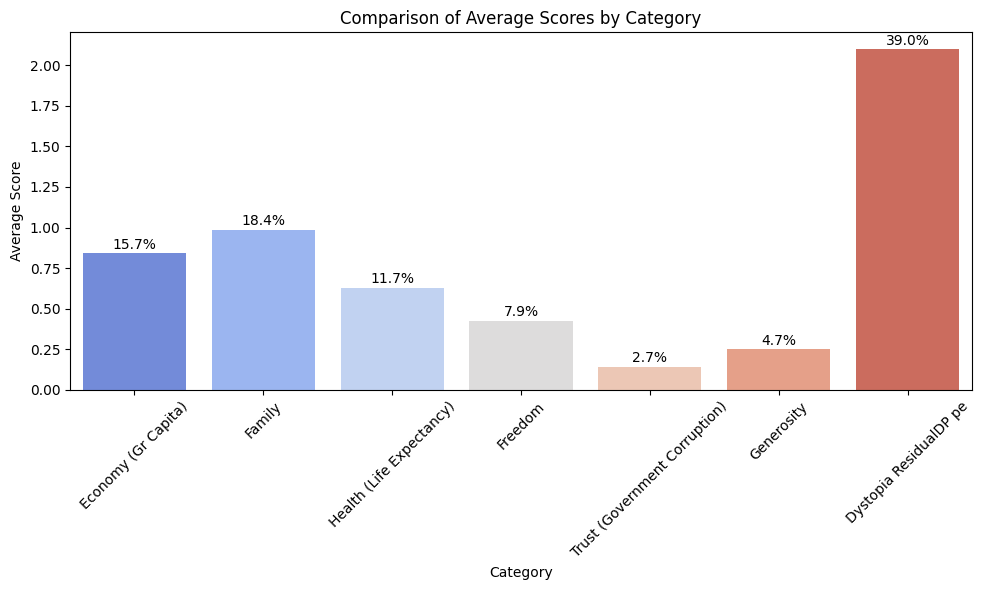

In [18]:
cols = ['Economy (Gr Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia ResidualDP pe']
averages = h15[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
avg_df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')
for index, row in avg_df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Comparison of Average Scores by Category')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5- Comparison of average scores by category for all regions with a happiness score greater than 5.3

C:\Users\User\AppData\Local\Temp\ipykernel_9456\1577390051.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')


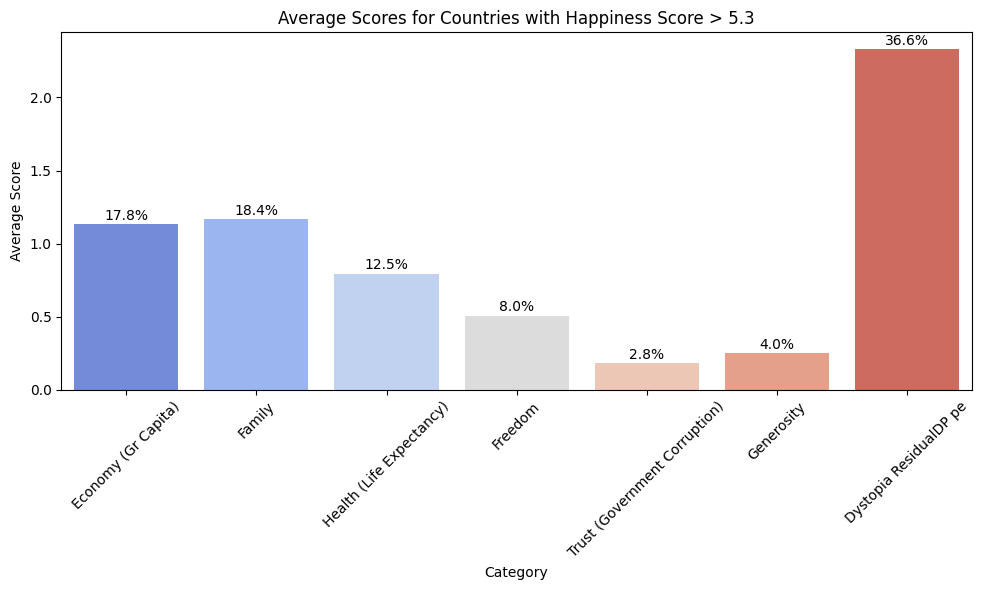

In [21]:
cols = ['Economy (Gr Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia ResidualDP pe']
high_score = h15[h15['Happiness Score'] > 5.3]
averages = high_score[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
avg_df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')
for index, row in avg_df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Scores for Countries with Happiness Score > 5.3')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6- Comparison of average scores by category for all areas with a happiness score less than or equal to 5.3

C:\Users\User\AppData\Local\Temp\ipykernel_9456\2195798770.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='viridis')


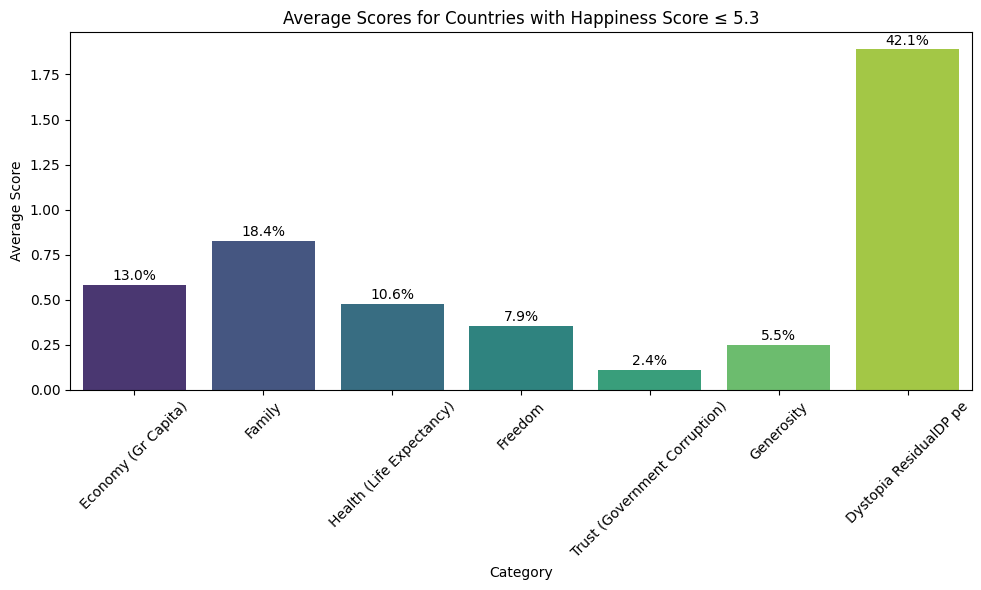

In [24]:
cols = ['Economy (Gr Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia ResidualDP pe']
low_score = h15[h15['Happiness Score'] <= 5.3]
averages = low_score[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
avg_df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='viridis')
for index, row in avg_df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Scores for Countries with Happiness Score ≤ 5.3')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


7- Average Indicators for Latin America and Caribbean Region

C:\Users\User\AppData\Local\Temp\ipykernel_9456\959715963.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


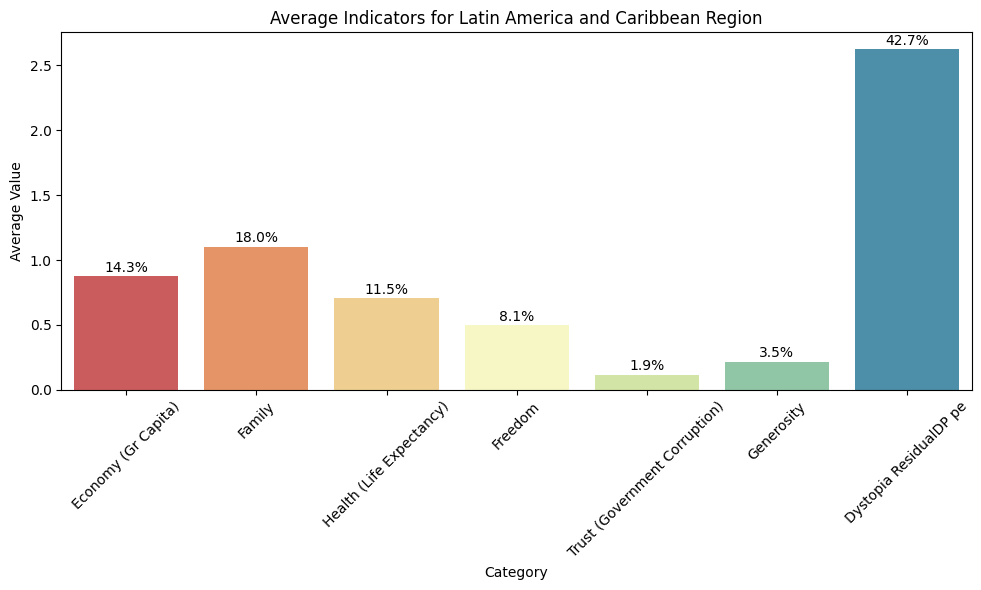

In [25]:
cols = ['Economy (Gr Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia ResidualDP pe']
latin = h15[h15['Region'] == 'Latin America and Caribbean']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Latin America and Caribbean Region')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


8- Average Indicators for Western Europe

C:\Users\User\AppData\Local\Temp\ipykernel_9456\1061795961.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


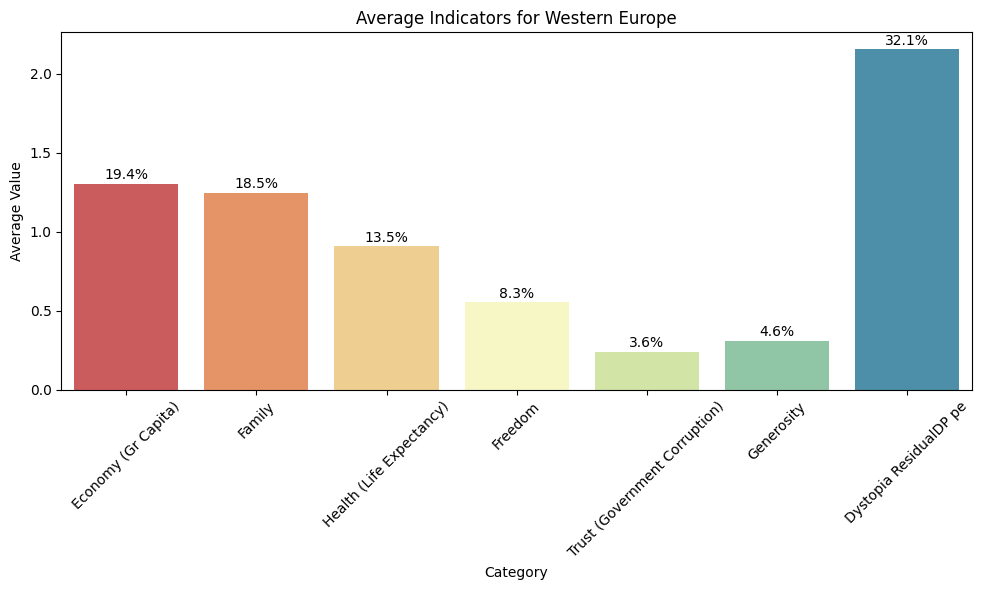

In [28]:
cols = ['Economy (Gr Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia ResidualDP pe']
latin = h15[h15['Region'] == 'Western Europe']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Western Europe')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9- Average Indicators for Eastern Europe

C:\Users\User\AppData\Local\Temp\ipykernel_9456\2039663089.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


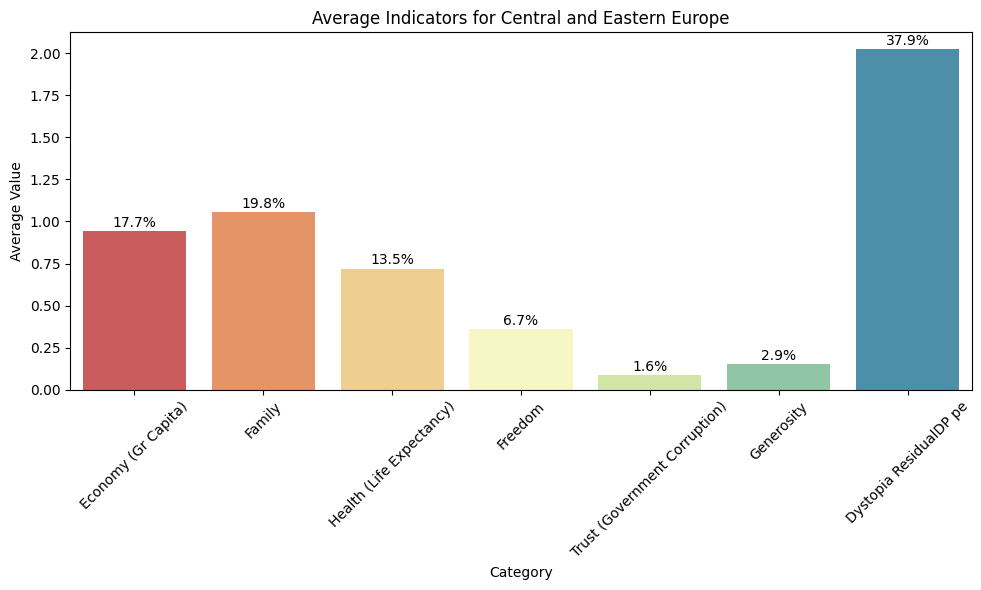

In [29]:
cols = ['Economy (Gr Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia ResidualDP pe']
latin = h15[h15['Region'] == 'Central and Eastern Europe']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Central and Eastern Europe')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

10- Average Indicators for Middle East and Northern Africa

C:\Users\User\AppData\Local\Temp\ipykernel_9456\1821416374.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


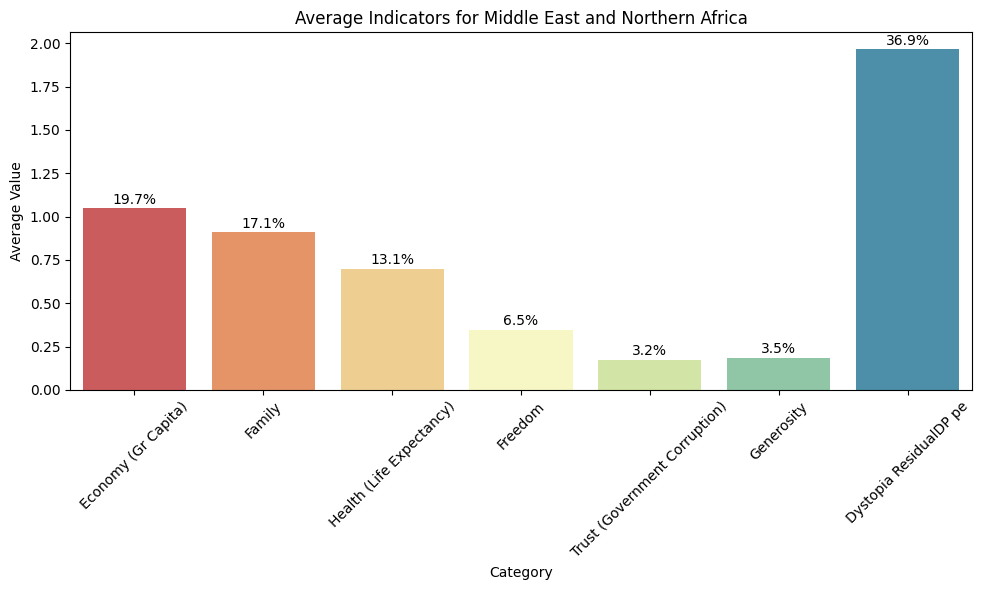

In [30]:
cols = ['Economy (Gr Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia ResidualDP pe']
latin = h15[h15['Region'] == 'Middle East and Northern Africa']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Middle East and Northern Africa')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

11- Average Indicators for Southeastern Asia

C:\Users\User\AppData\Local\Temp\ipykernel_9456\1743764877.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


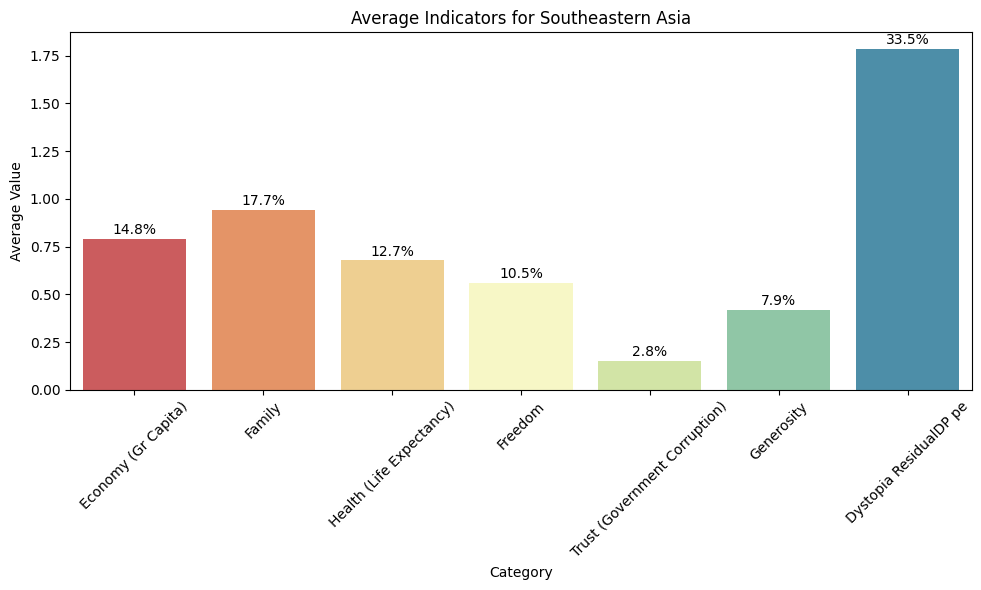

In [31]:
cols = ['Economy (Gr Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia ResidualDP pe']
latin = h15[h15['Region'] == 'Southeastern Asia']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Southeastern Asia')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

12- Average Indicators for Eastern Asia

C:\Users\User\AppData\Local\Temp\ipykernel_9456\295621215.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


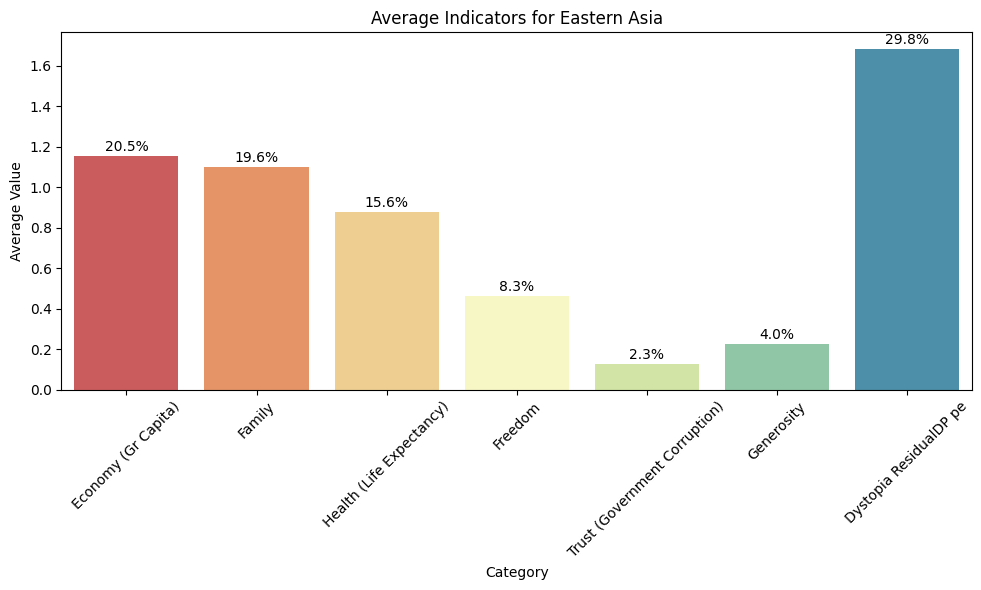

In [32]:
cols = ['Economy (Gr Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia ResidualDP pe']
latin = h15[h15['Region'] == 'Eastern Asia']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Eastern Asia')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

13- Average Indicators for Australia and New Zealand

C:\Users\User\AppData\Local\Temp\ipykernel_9456\1440168899.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


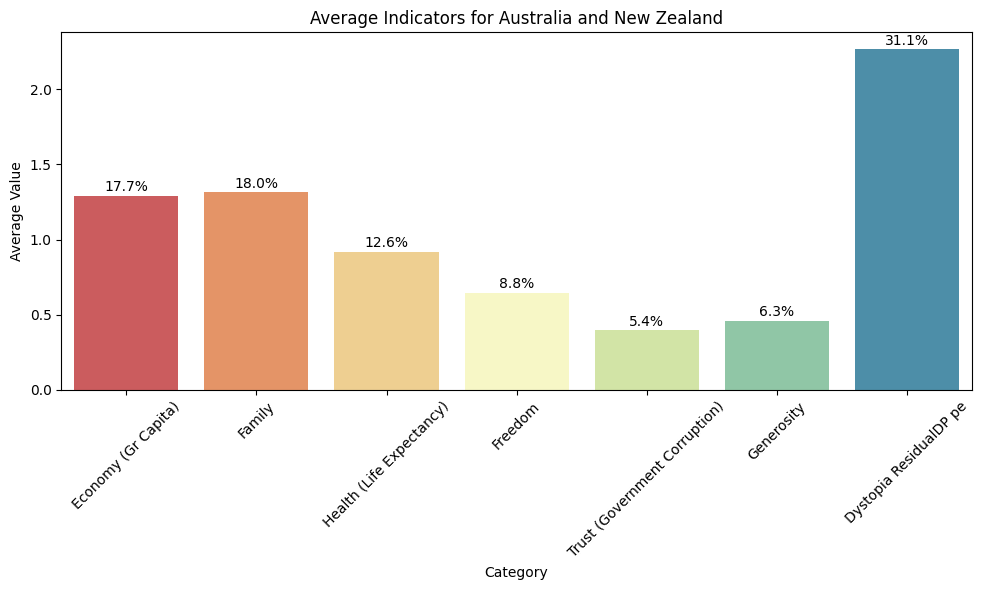

In [33]:
cols = ['Economy (Gr Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia ResidualDP pe']
latin = h15[h15['Region'] == 'Australia and New Zealand']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Australia and New Zealand')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

14- Average Indicators for North America

C:\Users\User\AppData\Local\Temp\ipykernel_9456\3202250636.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


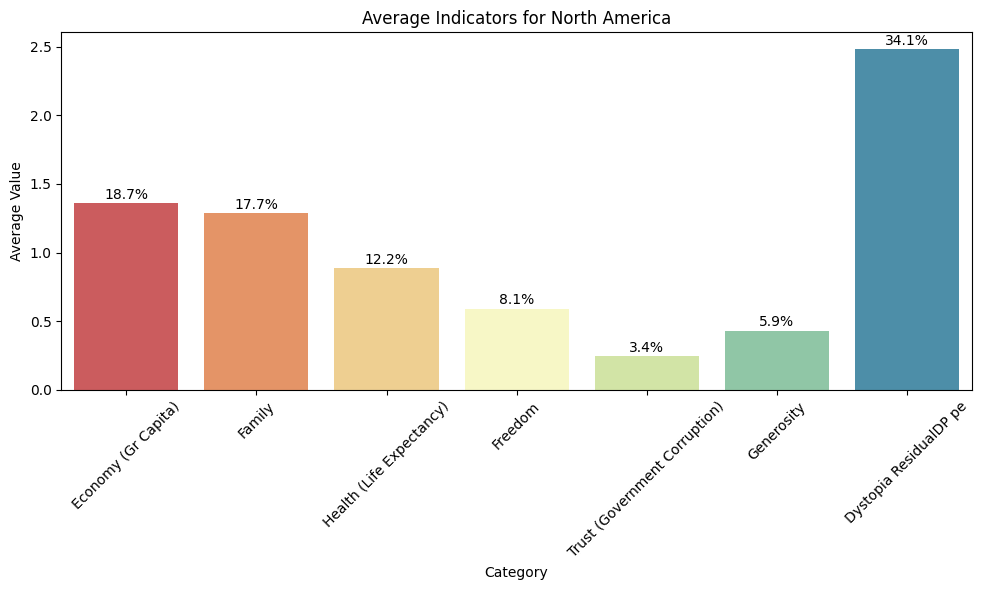

In [34]:
cols = ['Economy (Gr Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia ResidualDP pe']
latin = h15[h15['Region'] == 'North America']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for North America')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

15- Average Indicators for Sub-Saharan Africa

C:\Users\User\AppData\Local\Temp\ipykernel_9456\3570577077.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


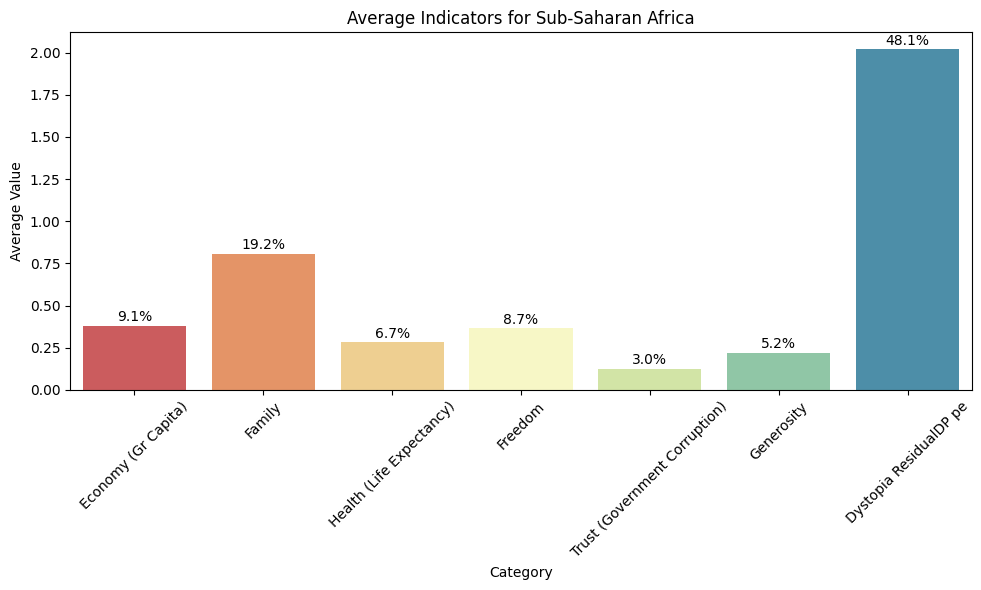

In [35]:
cols = ['Economy (Gr Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia ResidualDP pe']
latin = h15[h15['Region'] == 'Sub-Saharan Africa']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Sub-Saharan Africa')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

16- Top 10 Countries by Economy % of Happiness Score

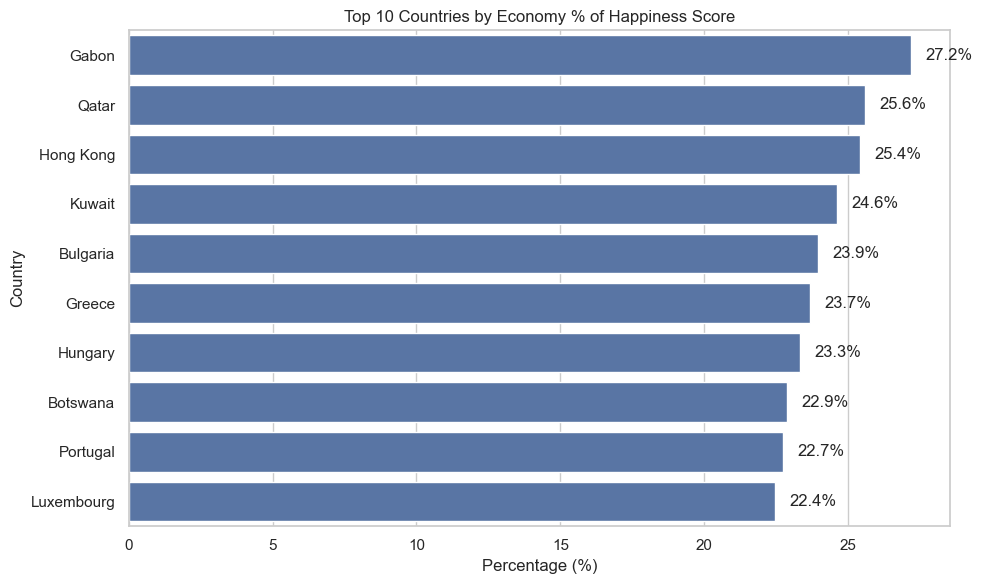

In [42]:

h15 = h15[h15['Happiness Score'] > 2].copy()

h15['Economy_pct'] = (h15['Economy (Gr Capita)'] / h15['Happiness Score']) * 100
top10 = h15.sort_values(by='Economy_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Economy_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Economy % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Economy_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()


17- Top 10 Countries by Family % of Happiness Score

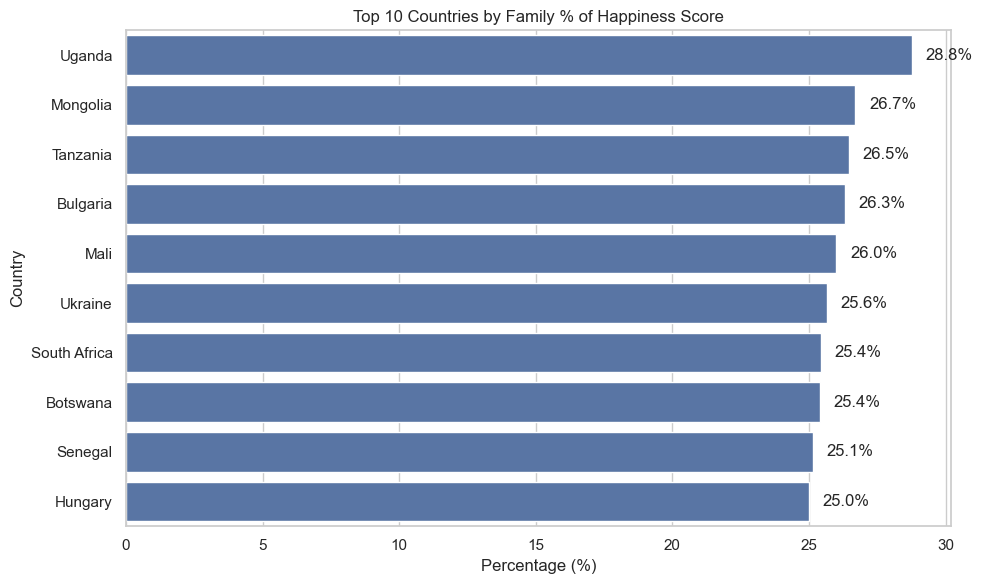

In [43]:
h15['Family_pct'] = (h15['Family'] / h15['Happiness Score']) * 100
top10 = h15.sort_values(by='Family_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Family_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Family % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Family_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()


18- Top 10 Countries by Health % of Happiness Score

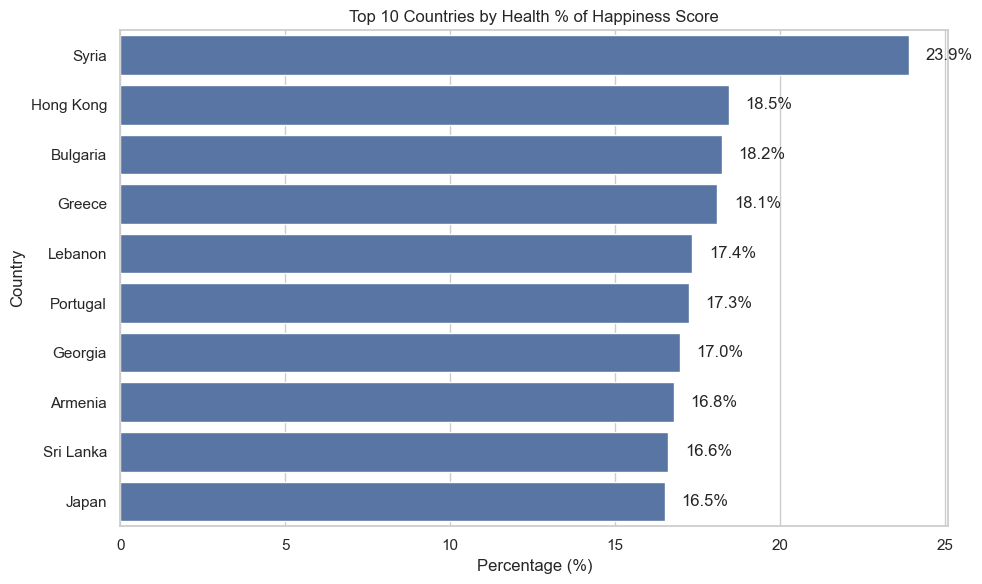

In [44]:
h15['Health_pct'] = (h15['Health (Life Expectancy)'] / h15['Happiness Score']) * 100
top10 = h15.sort_values(by='Health_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Health_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Health % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Health_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()


19- Top 10 Countries by Freedom % of Happiness Score

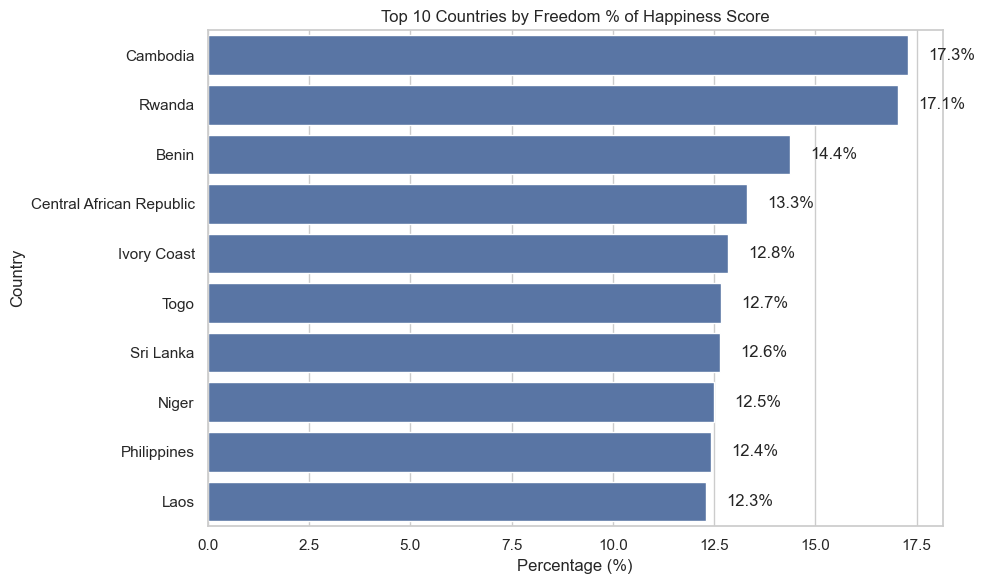

In [45]:
h15['Freedom_pct'] = (h15['Freedom'] / h15['Happiness Score']) * 100
top10 = h15.sort_values(by='Freedom_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Freedom_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Freedom % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Freedom_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()


20- Top 10 Countries by Trust % of Happiness Score

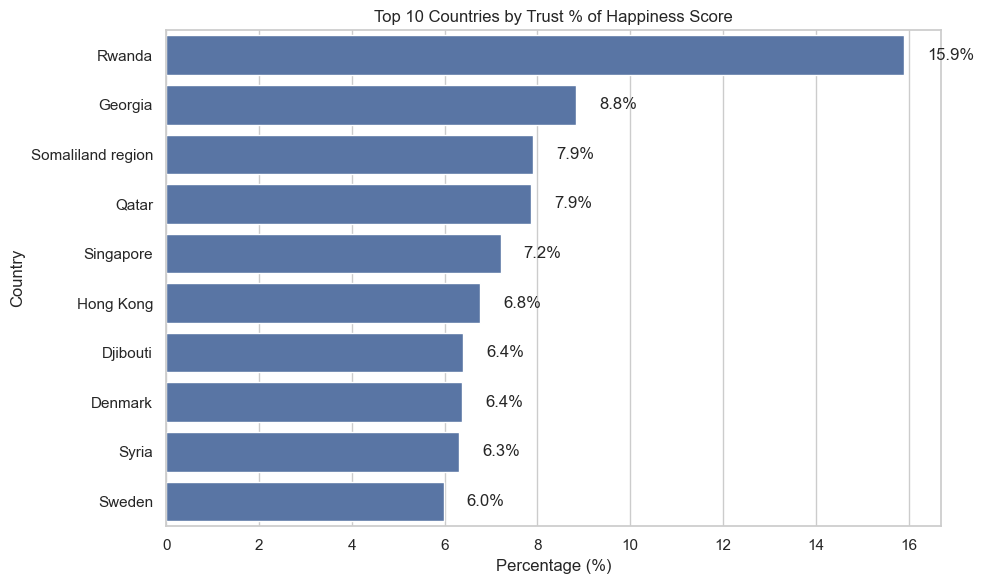

In [46]:
h15['Trust_pct'] = (h15['Trust (Government Corruption)'] / h15['Happiness Score']) * 100
top10 = h15.sort_values(by='Trust_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Trust_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Trust % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Trust_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()


21- Top 10 Countries by Generosity % of Happiness Score

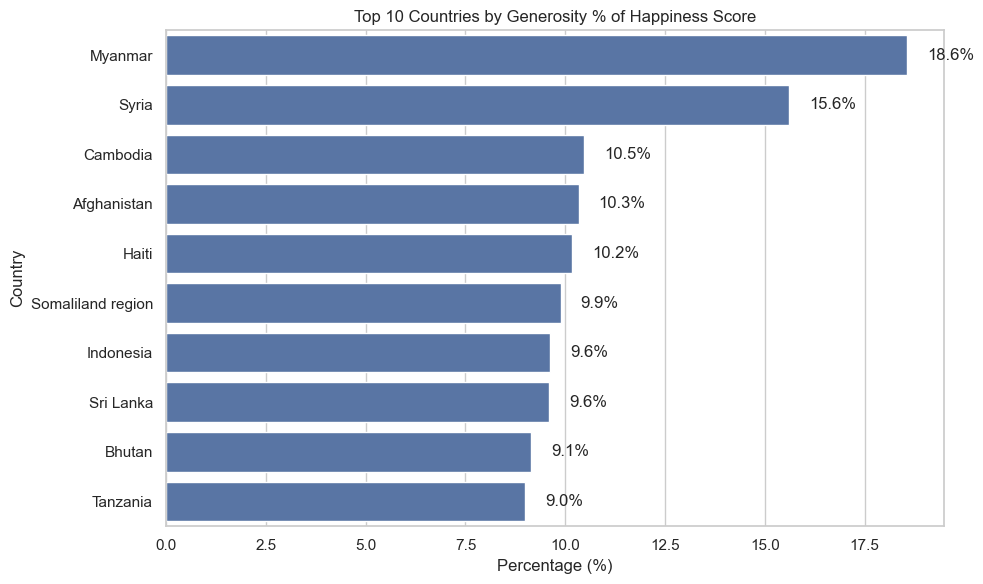

In [52]:
h15['Generosity_pct'] = (h15['Generosity'] / h15['Happiness Score']) * 100
top10 = h15.sort_values(by='Generosity_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Generosity_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Generosity % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Generosity_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()


22-  Top 10 Countries by Dystopia ResidualDP pe % of Happiness Score

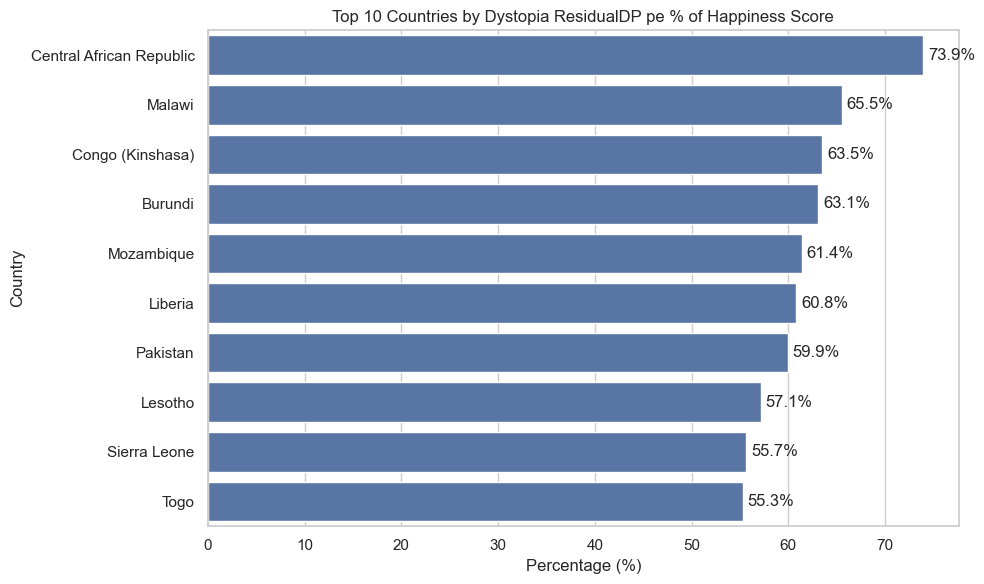

In [53]:
h15['Dystopia ResidualDP pe_pct'] = (h15['Dystopia ResidualDP pe'] / h15['Happiness Score']) * 100
top10 = h15.sort_values(by='Dystopia ResidualDP pe_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Dystopia ResidualDP pe_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Dystopia ResidualDP pe % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Dystopia ResidualDP pe_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

23- Top 10 Countries by Economy (Gr Capita)

C:\Users\User\AppData\Local\Temp\ipykernel_9456\1149524661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Economy (Gr Capita)', y='Country', data=top_10, palette='crest')


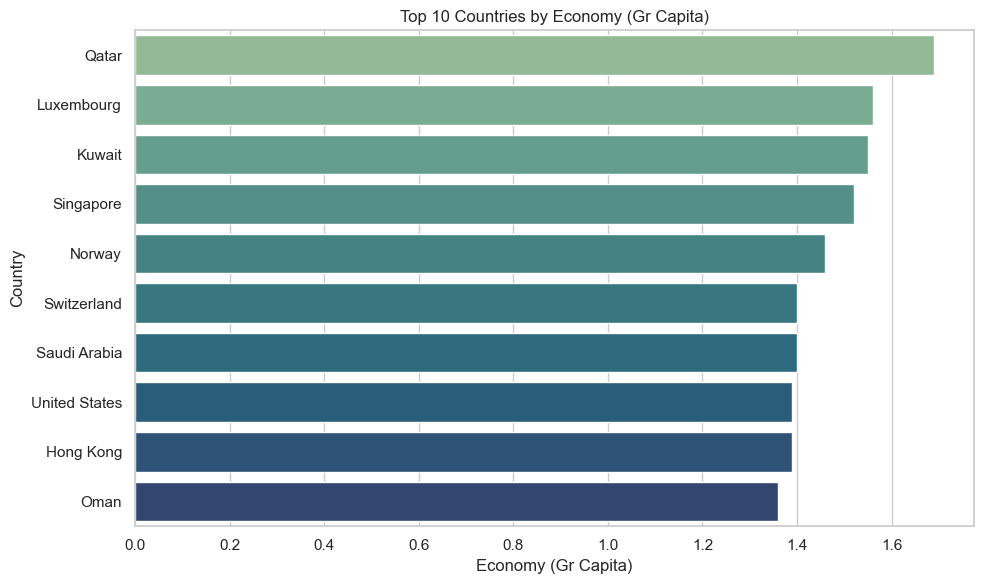

In [55]:
top_10 = h15[['Country', 'Economy (Gr Capita)']].sort_values(by='Economy (Gr Capita)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Economy (Gr Capita)', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Economy (Gr Capita)')
plt.xlabel('Economy (Gr Capita)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


24- Top 10 Countries by Family

C:\Users\User\AppData\Local\Temp\ipykernel_9456\1286157477.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Family', y='Country', data=top_10, palette='crest')


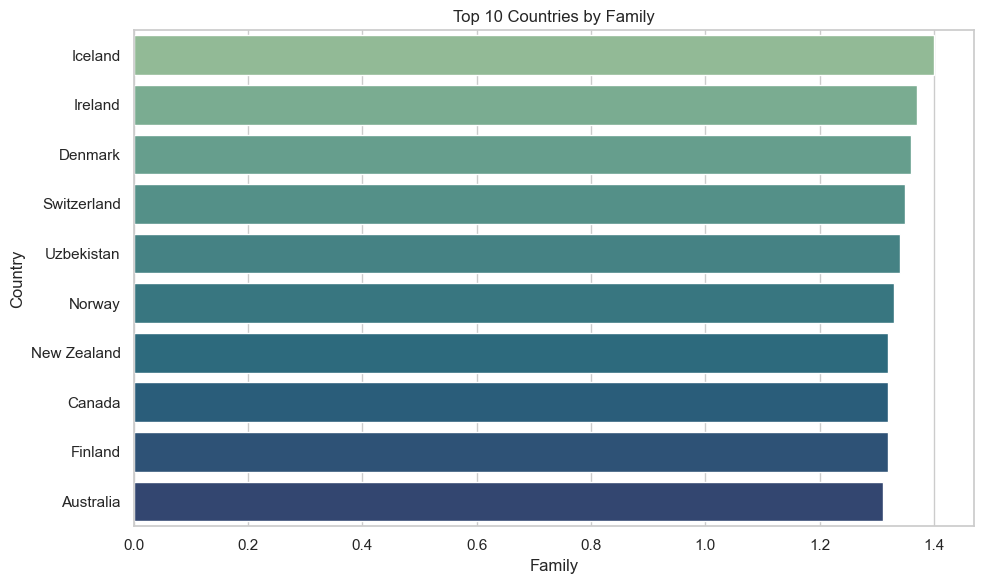

In [56]:
top_10 = h15[['Country', 'Family']].sort_values(by='Family', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Family', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Family')
plt.xlabel('Family')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

25- Top 10 Countries by Health (Life Expectancy)

C:\Users\User\AppData\Local\Temp\ipykernel_9456\3542136039.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Health (Life Expectancy)', y='Country', data=top_10, palette='crest')


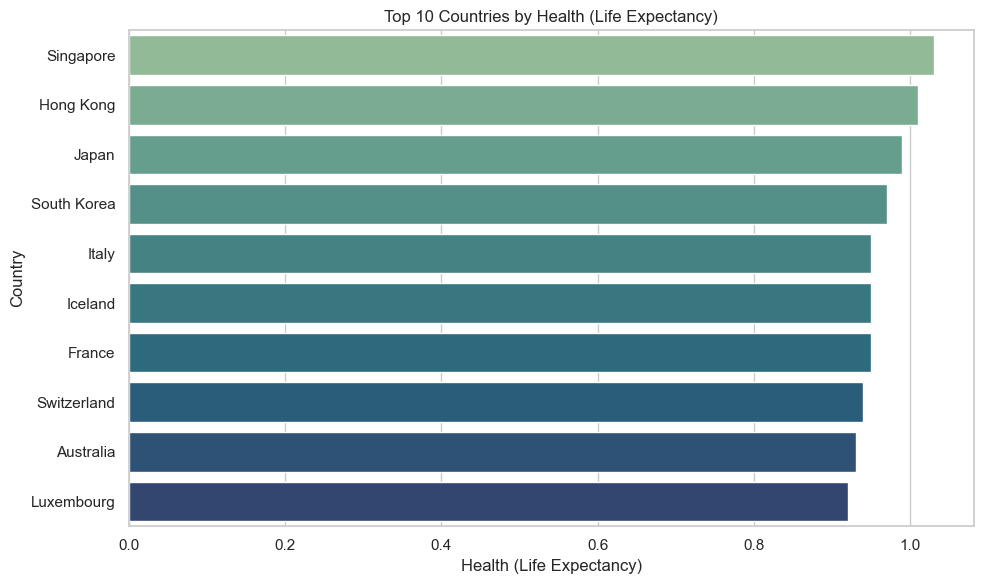

In [57]:
top_10 = h15[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Health (Life Expectancy)', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


26- Top 10 Countries by Freedom

C:\Users\User\AppData\Local\Temp\ipykernel_9456\1192918040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Freedom', y='Country', data=top_10, palette='crest')


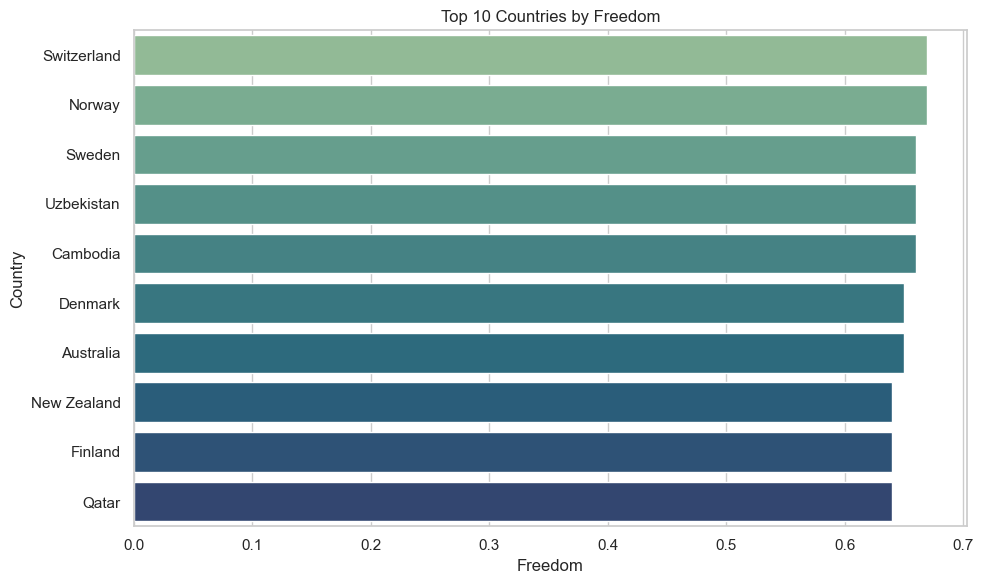

In [58]:
top_10 = h15[['Country', 'Freedom']].sort_values(by='Freedom', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Freedom', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Freedom')
plt.xlabel('Freedom')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


27- Top 10 Countries by Trust (Government Corruption)

C:\Users\User\AppData\Local\Temp\ipykernel_9456\2975111270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trust (Government Corruption)', y='Country', data=top_10, palette='crest')


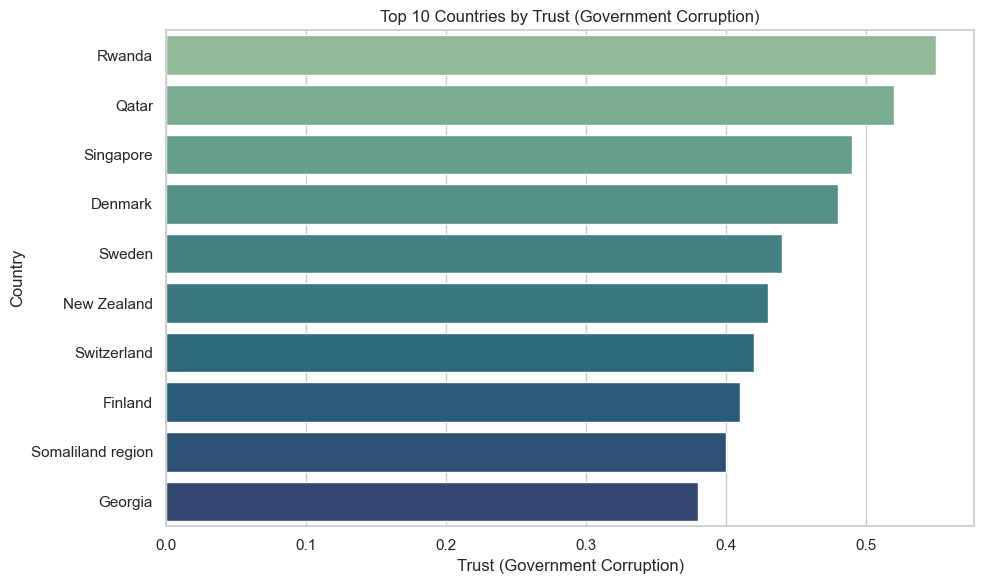

In [59]:
top_10 = h15[['Country', 'Trust (Government Corruption)']].sort_values(by='Trust (Government Corruption)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Trust (Government Corruption)', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Trust (Government Corruption)')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


28- Top 10 Countries by Generosity

C:\Users\User\AppData\Local\Temp\ipykernel_9456\511993535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Generosity', y='Country', data=top_10, palette='crest')


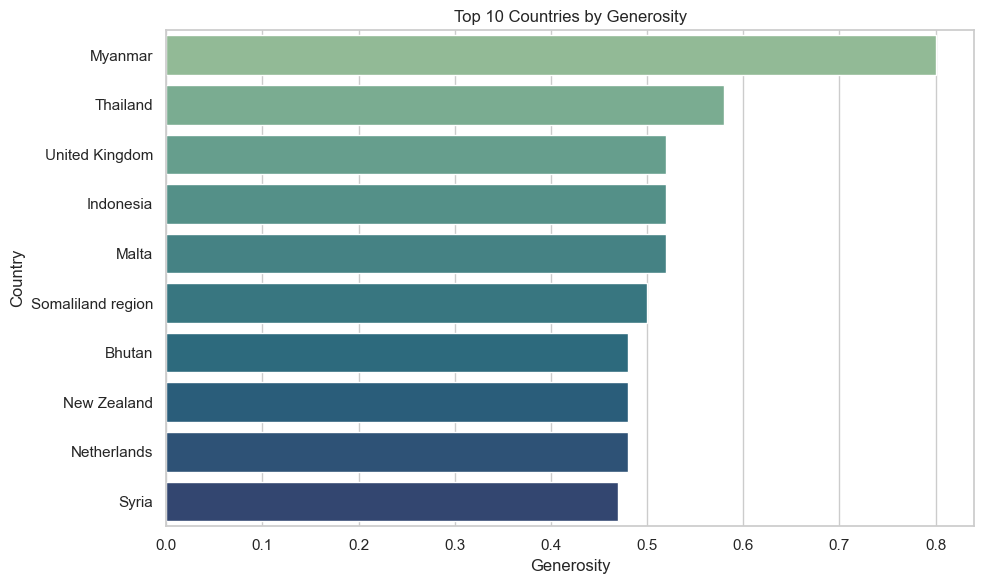

In [60]:
top_10 = h15[['Country', 'Generosity']].sort_values(by='Generosity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Generosity', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Generosity')
plt.xlabel('Generosity')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


29- Top 10 Countries by Dystopia ResidualDP pe

C:\Users\User\AppData\Local\Temp\ipykernel_9456\2894507874.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dystopia ResidualDP pe', y='Country', data=top_10, palette='crest')


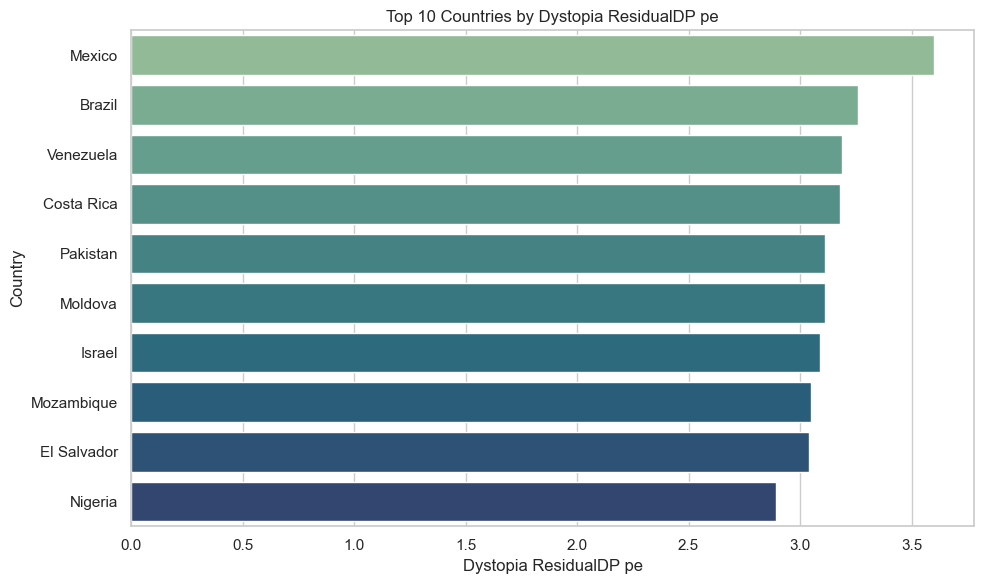

In [61]:
top_10 = h15[['Country', 'Dystopia ResidualDP pe']].sort_values(by='Dystopia ResidualDP pe', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Dystopia ResidualDP pe', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Dystopia ResidualDP pe')
plt.xlabel('Dystopia ResidualDP pe')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


30- Top Region per Feature (Absolute Values)

C:\Users\User\AppData\Local\Temp\ipykernel_9456\1367967239.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_abs, x='Value', y='Feature', palette='Set2')


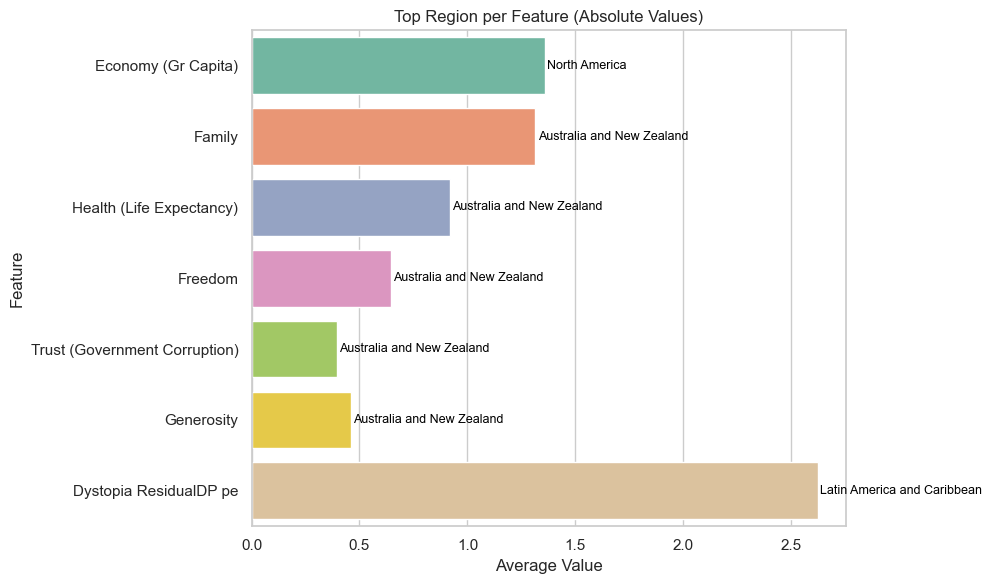

In [62]:
features = [
    'Economy (Gr Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Dystopia ResidualDP pe'
]
data = h15[['Region'] + features].dropna()
top_regions_abs = []
for feature in features:
    region_avg = data.groupby('Region')[feature].mean()
    top_region = region_avg.idxmax()
    top_value = region_avg.max()
    top_regions_abs.append({'Feature': feature, 'Value': top_value, 'Region': top_region})
df_abs = pd.DataFrame(top_regions_abs)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_abs, x='Value', y='Feature', palette='Set2')
for i, row in df_abs.iterrows():
    ax.text(row['Value'] + 0.01, i, row['Region'], va='center', fontsize=9, color='black')
plt.title('Top Region per Feature (Absolute Values)')
plt.xlabel('Average Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


31- Top Region per Feature (as % of Happiness Score)

C:\Users\User\AppData\Local\Temp\ipykernel_9456\1474544863.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_ratio, x='Value', y='Feature', palette='Set3')


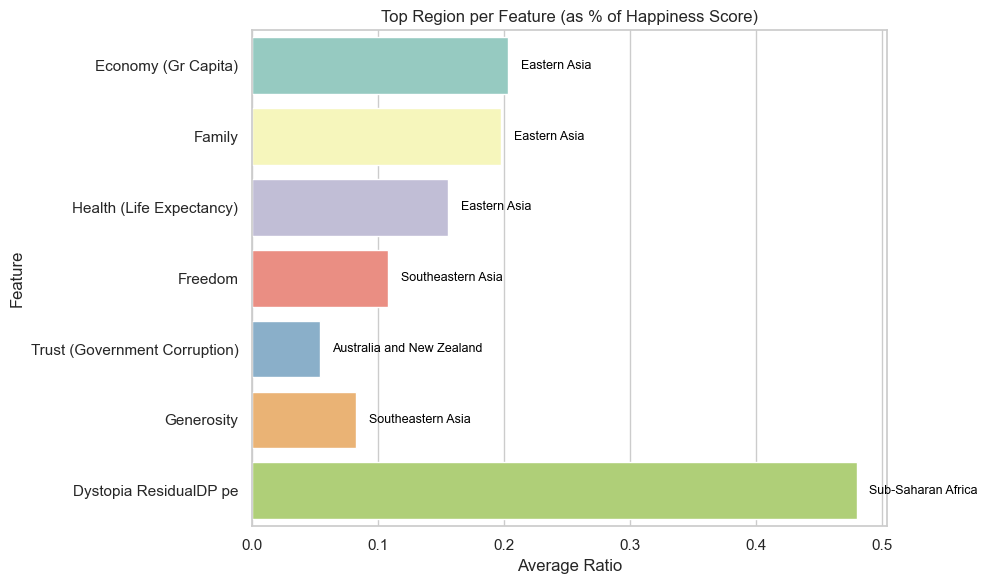

In [63]:
features = [
    'Economy (Gr Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Dystopia ResidualDP pe'
]
data = h15[['Region', 'Happiness Score'] + features].dropna()
top_regions_ratio = []
for feature in features:
    data['Ratio'] = data[feature] / data['Happiness Score']
    region_avg_ratio = data.groupby('Region')['Ratio'].mean()
    top_region = region_avg_ratio.idxmax()
    top_value = region_avg_ratio.max()
    top_regions_ratio.append({'Feature': feature, 'Value': top_value, 'Region': top_region})
df_ratio = pd.DataFrame(top_regions_ratio)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_ratio, x='Value', y='Feature', palette='Set3')
for i, row in df_ratio.iterrows():
    ax.text(row['Value'] + 0.01, i, row['Region'], va='center', fontsize=9, color='black')
plt.title('Top Region per Feature (as % of Happiness Score)')
plt.xlabel('Average Ratio')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
